In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Loading the CSV file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
na_values = ['N/a', 'na', np.nan]
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values = na_values)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Checking for NULL or Repeated values in the data

In [4]:
df.isnull().sum() # so it is apparent that there are no missing values in our data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
print("Repeated values:",df.duplicated().sum())

Repeated values: 0


# Preparing the data for implementing machine learning

In [6]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# To see the mapping
gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_mapping)

{'Female': 0, 'Male': 1}


In [7]:
df.Churn.value_counts()*100/len(df)

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [8]:
df['Partner'].value_counts()
df['Partner'] = le.fit_transform(df['Partner'])

# To see the mapping
partner_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(partner_mapping)

df.head(1)

{'No': 0, 'Yes': 1}


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [9]:
df['Dependents'] = le.fit_transform(df['Dependents'])

# To see the mapping
partner_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(partner_mapping)

{'No': 0, 'Yes': 1}


In [10]:
df['PhoneService'] = le.fit_transform(df['PhoneService'])

# To see the mapping
partner_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(partner_mapping)

{'No': 0, 'Yes': 1}


In [11]:
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])

# To see the mapping
partner_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(partner_mapping)

{'No': 0, 'No phone service': 1, 'Yes': 2}


In [12]:
df['InternetService'] = le.fit_transform(df['InternetService'])

# To see the mapping
partner_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(partner_mapping)

{'DSL': 0, 'Fiber optic': 1, 'No': 2}


In [13]:
tuple = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for i in tuple:
    df[i] = le.fit_transform(df[i])
    partner_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(partner_mapping, end = '\n')

{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'Month-to-month': 0, 'One year': 1, 'Two year': 2}
{'No': 0, 'Yes': 1}
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}


In [14]:
df['Churn'] = le.fit_transform(df['Churn'])

# To see the mapping
partner_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(partner_mapping)

{'No': 0, 'Yes': 1}


In [15]:
df.drop(columns=['customerID'], inplace=True)

In [16]:
df['MonthlyCharges'][0].dtype

dtype('float64')

In [17]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [18]:
type(df['TotalCharges'][0]) #Clever, it is of string type. As we are already considering the monthly charges, we will drop the TotalCharges
df.drop(columns=['TotalCharges'], inplace=True)

# Data Analysis

Text(0.5, 1.0, 'Correlation Plot')

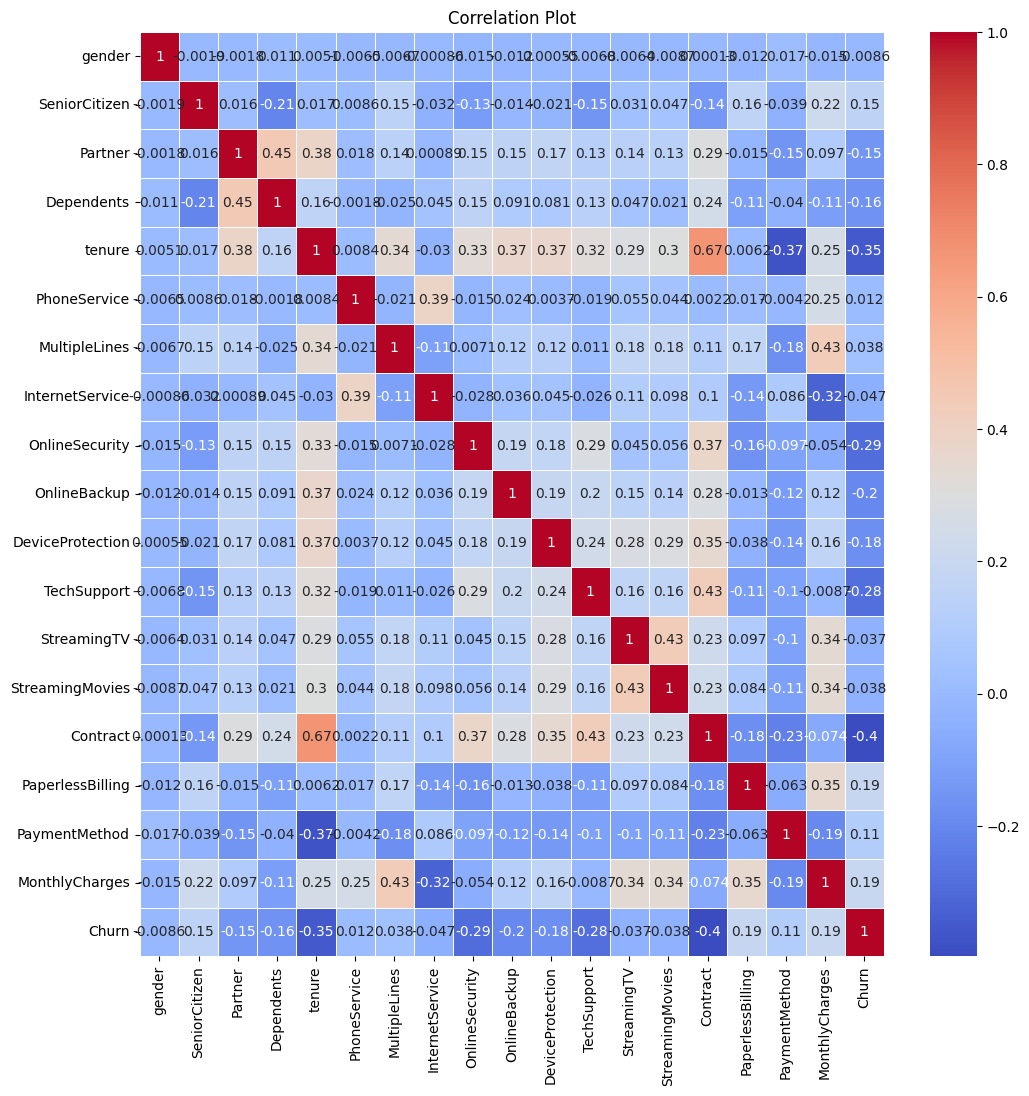

In [19]:
# Implementing heatmap for feature selection
corr_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Plot")

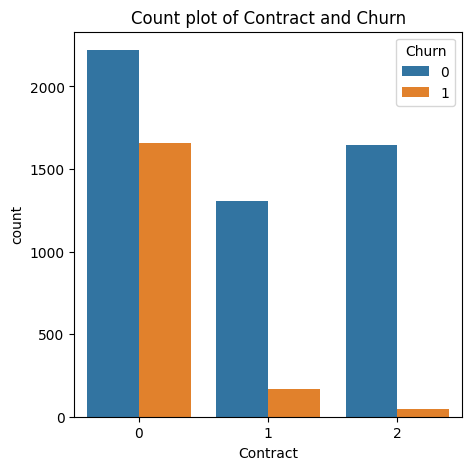

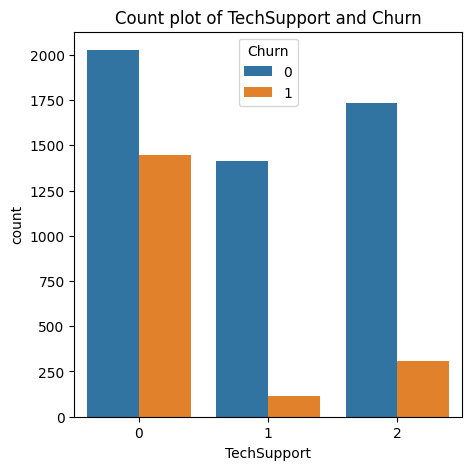

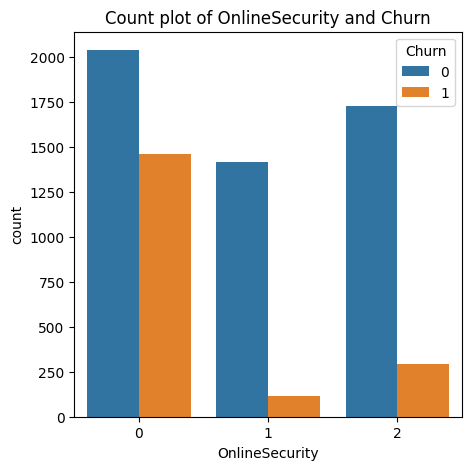

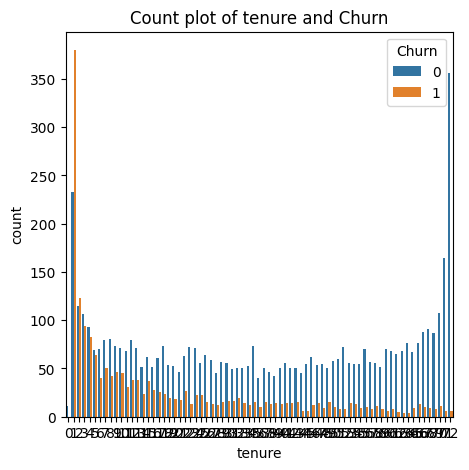

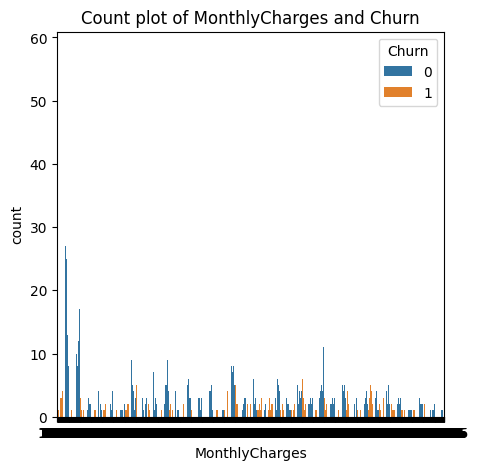

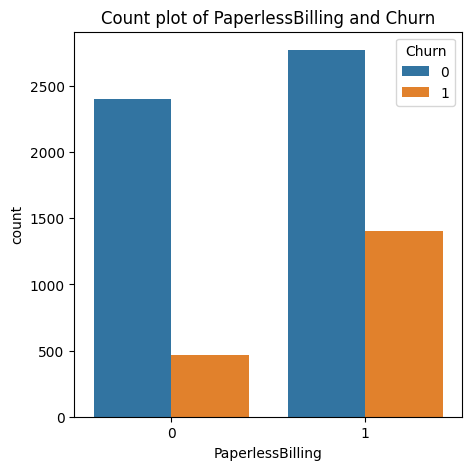

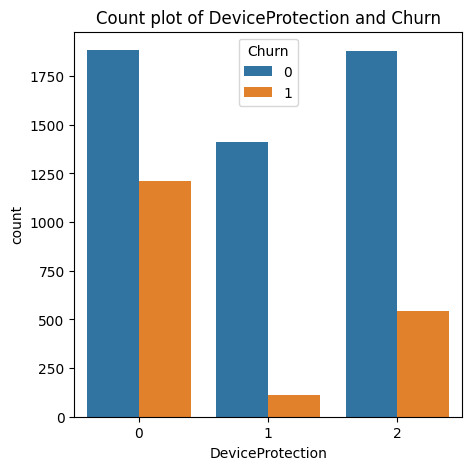

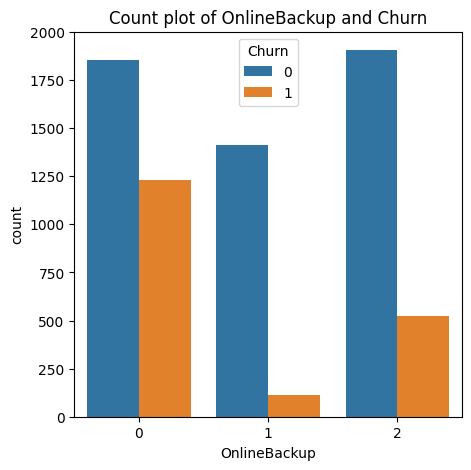

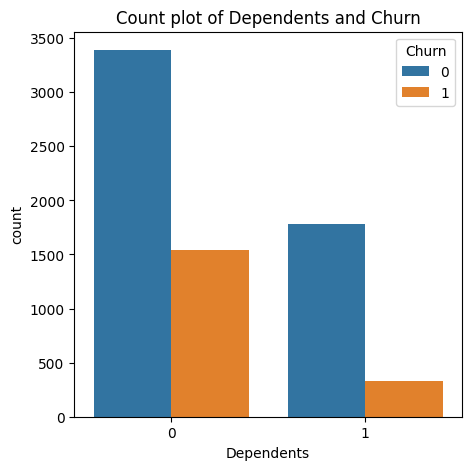

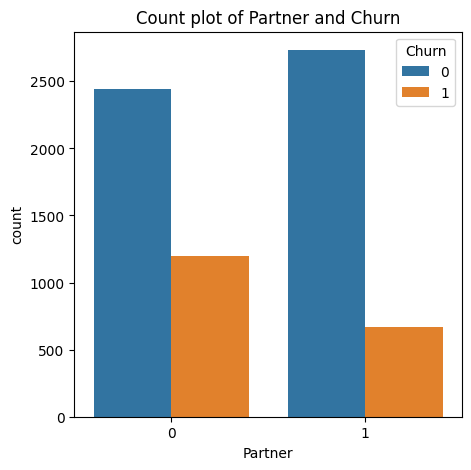

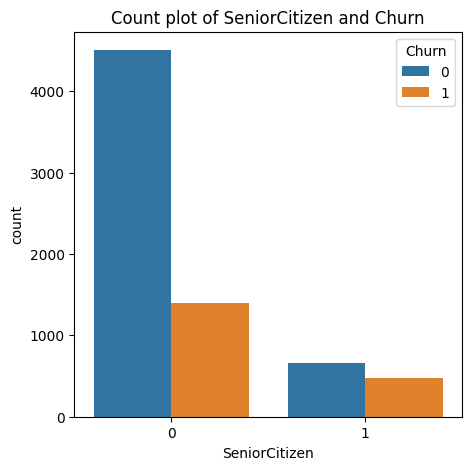

In [20]:
selected_values = ['Contract', 'TechSupport', 'OnlineSecurity', 'tenure', 'MonthlyCharges', 'PaperlessBilling','DeviceProtection', 'OnlineBackup', 'Dependents', 'Partner','SeniorCitizen']

for _ in selected_values:
    plt.figure(figsize=(5,5))
    sns.countplot(x = _ , hue='Churn', data=df)
    plt.title(f'Count plot of {_} and Churn')
    plt.show()

In [21]:
# Data selection
x = df[selected_values]
y = df['Churn']

x

,Contract,TechSupport,OnlineSecurity,tenure,MonthlyCharges,PaperlessBilling,DeviceProtection,OnlineBackup,Dependents,Partner,SeniorCitizen
0,0,0,0,1,29.85,1,0,2,0,1,0
1,1,0,2,34,56.95,0,2,0,0,0,0
2,0,0,2,2,53.85,1,0,2,0,0,0
3,1,2,2,45,42.30,0,2,0,0,0,0
4,0,0,0,2,70.70,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2,2,24,84.80,1,2,0,1,1,0
7039,1,0,0,72,103.20,1,2,2,1,1,0
7040,0,0,2,11,29.60,1,0,0,1,1,0
7041,0,0,0,4,74.40,1,0,0,0,1,1


In [22]:
# Pre Modelling Processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
import xgboost as xgb

# Evaluation Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify=y, random_state = 1)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Classifiers being used
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Trying all of 'em
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Training Logistic Regression...
Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

------------------------------------------------------------
Training SVM...
Results for SVM:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1035
           1       0.67      0.37      0.48       374

    accuracy                           0.78      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.77      0.78      0.76      1409

------------------------------------------------------------
Training Random Forest...
Results for Random Forest:
              precision    recall  f1-score   support

           0      